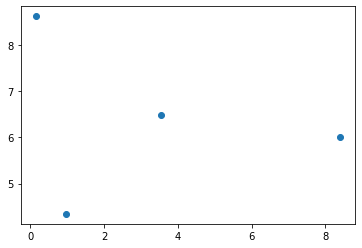

Streaming output truncated to the last 5000 lines.
n 6292
x_ini 3.703398200862493
vini -0.032739884188462264
r 5999
c 0
c 1
c 2
c 3
z 1
index 1
n 6293
x_ini 6.624396078725392
vini -0.01606407640201058
r 5999
c 0
c 1
c 2
c 3
z 1
index 1
n 6294
x_ini 4.375716403501809
vini -0.006423541485332647
r 5999
c 0
c 1
c 2
c 3
z 1
index 1
n 6295
z 1
index 1
n 6296
x_ini 2.7978846426862196
vini -0.0022156712583173256
r 5999
c 0
c 1
c 2
c 3
z 1
index 1
n 6297
x_ini 1.7319433958186643
vini -0.0031047608562657196
r 5999
c 0
c 1
c 2
c 3
z 1
index 3
n 6298
x_ini 5.742379554899059
vini -0.02634353599597136
r 5999
c 0
c 1
c 2
c 3
z 1
index 2
n 6299
z 1
index 0
n 6300
x_ini 7.0571840473556975
vini -0.010807489640475119
r 5999
c 0
c 1
c 2
c 3
z 1
index 2
n 6301
x_ini 0.2810116857820688
vini -0.01112714535027494
r 5999
c 0
c 1
c 2
c 3
z 1
index 3
n 6302
z 1
index 1
n 6303
z 1
index 2
n 6304
x_ini 8.860516748805757
vini -0.0072269605488343575
r 5999
c 0
c 1
c 2
c 3
z 1
index 3
n 6305
z 1
index 2
n 6306
x_ini 

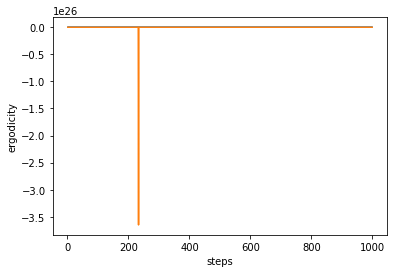

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import time
from datetime import datetime
import numpy as np
import sympy as sym
import math
import array
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as sx
import matplotlib.mlab as mlab
from sklearn.neighbors import KernelDensity as kd
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import random
from cmath import sqrt
y = 2

atoms = 50
copies = 3
steps = 1000

long = (3*y+1)*steps

v_total =[[[(p,i,n)for n in range(atoms)]for i in range(long)]for p in range(copies)]
b = steps-1
ergo = [[(p,i) for i in range(b)]for p in range(long)]
v_sqr_avgst = [[(p,i) for i in range(long)]for p in range(copies)]
v_avg_sqrst = [[(p,i) for i in range(long)]for p in range(copies)]
v_avgstore = [[(p,i) for i in range(long)]for p in range(copies)]

delta_store = []
acceptance = []

dt = 300
sigma = 1
g_store = []
x_store= [(0) for i in range (atoms)]
y_store= [(0) for i in range(atoms)]
min_value = 0.
max_value = 10.
delta =3
sig = 10/atoms
copies = 2
a = 2
kb = 1.98e-3
distance_store = []
dis_store = []
epsilon = 2

#print("ghg")
def rand_generator(a,b):
    val = random.uniform(a,b)
    return val

def potential(x):
     v = 4*epsilon*((sigma/x)**12-(sigma/x)**6)


     return(v)

def cut_off(x_new,y_new):
    if x_new > max_value:
       x_new -= max_value

    if y_new > max_value:
       y_new -= max_value
    if x_new <= min_value:
         x_new += max_value
    if y_new <= min_value:
         y_new += max_value

    return(x_new,y_new)


def min_image(x_ini,y_ini,l):

      x_gap = (x_ini-x_store[l])
      y_gap = (y_ini-y_store[l])
      if x_gap > max_value/2 :
                    x_gap = 10 - x_gap
      if y_gap > max_value/2:
                    y_gap = 10 -y_gap


      gap = math.sqrt(x_gap**2 +y_gap**2)

      v_later = potential(gap)
      return(v_later)

def remd(ex1_v,ex2_v,temp1,temp2):
        temp1 = temp1+1
        temp2 = temp1+1
        temp1 = temp1*300
        temp2 =temp2*300
        dE = ex2_v - ex1_v
        dbeta  = (1/kb)*(1/temp1)-(1/temp2)
        bolt = dE*dbeta
        exp_val = np.exp(bolt)
        q = rand_generator(0,1)
        if q <= exp_val:
            select = 1
        else:
            select = 0
        return select

def before_exchange(x,y,step,temp,dt):
    while x<y:
        ex1_v = 0
        ex2_v = 0
        temp1 = x
        temp2 = x+1
        for i in range(atoms):


            v11= v_total[temp1][step][i]
            ex1_v = ex1_v+v11
            print("copies",temp1)
            print("atoms",i)
            #print("x",x)
            v22 = v_total[temp2][step][i]
            ex2_v = ex2_v+v22
        select= remd(ex1_v,ex2_v,temp1,temp2)
        if select == 1:
            for i in range (atoms):
               #print("selected")

               for l in range(step,long):
                    ex1_x = rx_store[temp1][i][l]
                    ex1_y = ry_store[temp1][i][l]
                    ex1_v = v_total[temp1][l][i]

                    ex2_x = rx_store[temp2][i][l]
                    ex2_y = ry_store[temp2][i][l]
                    ex2_v = v_total[temp2][l][i]


                    rx_store[temp1][i][l] = ex2_x
                    ry_store[temp1][i][l] = ex2_y
                    v_total[temp1][l][i] = ex2_v
                    rx_store[temp2][i][l] = ex1_x
                    ry_store[temp2][i][l] = ex1_y
                    v_total[temp2][l][i] = ex1_v
            #else:
              #print("not selected")
        x = x+2
        i = i + 2
        temp = temp+dt*2

def boltzmann(dE,T):
  a = (-1*dE)/(kb*T)
  exp_val = np.exp(a)
  return exp_val

def select(x_ini,y_ini,x_later,y_later,v_ini,v_later,T):

  if v_later < v_ini:
    v_ini = v_later
    x_ini = x_later
    y_ini =y_later

  else:
    dE = v_later-v_ini
    #print("DE",dE)
    q = rand_generator(0,1)
    #print("r",r)

    #print("random",r)
    bolt = boltzmann(dE,T)
    #print("bolt",bolt)
    if (q <= bolt):
      v_ini = v_later
      x_ini = x_later
      y_ini = y_later


  return x_ini,y_ini,v_ini

def move(x_ini,y_ini,delta):
    x_new = x_ini + rand_generator(-1,1)*delta
    y_new = y_ini + rand_generator(-1,1)*delta
    #print('**',x_new,y_new)
    xi,yi= cut_off(x_new,y_new)

    #print(xi,yi)
    return xi,yi

def mc(temp,start,increments):
  for z in range(copies):
    v_sqr = 0
    v_sqr_t = 0
    v_tot = 0
    v_avg = 0
    v_avg_sqr = 0
    print("z",z)
    t = atoms

    for n in range(start,increments):


          index= int(random.uniform(0,t))




          print("z",z)
          print("index",index)
          print("n",n)

          x_ini = rx_store[z][index][n]
          #print(x_ini)
          y_ini = ry_store[z][index][n]
          #print(y_ini)
          x_ii,y_ii = move(x_ini,y_ini,delta)

          gap1_store = []

          v_tot = 0

          for l in range(atoms):
              if l != index :



                x_nei = rx_store[z][l][n]
                #print(x_ini)
                y_nei = ry_store[z][l][n]
                #print(y_ini)

                #print("l",l)


                x_gap = abs(x_ii-x_nei)
                y_gap = abs(y_ii-y_nei)
                if x_gap > max_value/2 :
                      x_gap = 10 - x_gap
                if y_gap > max_value/2:
                        y_gap = 10 -y_gap

                gap = math.sqrt(x_gap**2 + y_gap**2)
                #print("here")
                v = potential(gap)
                v_tot = v_tot + v
                gap1_store.append(gap)

                #print("gap",gap1_store)
                o = (len(gap1_store))

          count = 0
          for b in range(o):
              if gap1_store[b] < sig:
                break
              else:
                count = count  +1




          if count == o:


                v_ini = v_total[z][n][index]

                #print ("temp",temp)


                print("x_ini",x_ini)
                print("vini",v_ini)
                print("r",r)
                x_ini,y_ini,v_ini= select(x_ini,y_ini,x_ii,y_ii,v_ini,v_tot,temp)

                d = long -n
                for l in range(n,long):
                    v_total[z][l][index] = v_ini


                for l in range(n,long):
                    rx_store[z][index][l] = x_ini
                    ry_store[z][index][l] = y_ini





                for c in range(atoms):




                            print("c",c)
                            x_ini = rx_store[z][c][n]
                          #  print(x_ini)
                            y_ini = ry_store[z][c][n]
                          # print(y_ini)

                            for u in range(atoms):
                                if u != c :


                                  x_nei = rx_store[z][u][n]
                                  #print("x_nei",x_nei)
                                  y_nei = ry_store[z][u][n]
                                  #print("y_nei",y_nei)
                                  x_gap = abs(x_ini-x_nei)
                                  y_gap = abs(y_ini-y_nei)
                                  if x_gap > max_value/2 :
                                        x_gap = 10 - x_gap
                                  if y_gap > max_value/2:
                                          y_gap = 10 -y_gap

                                  gap = math.sqrt(x_gap**2 + y_gap**2)
                                  #print("here")
                                  v = potential(gap)
                                  v_tot = v_tot + v
                                  v_sqr = v**2+v_sqr
                                  #print("v_tot",v_tot)
                                  #print("v_sqr",v_sqr)

          v_avg = float(v_tot/atoms)
          v_avgstore[z][n]=v_avg
          v_avg_sqr = v_avg**2
          v_avg_sqrst[z][n] = v_avg_sqr

          v_sqr_avg = v_sqr/atoms
          v_sqr_avgst[z][n] = v_sqr_avg

    temp = temp+dt



acc = 0

copies = 2
rx_store = [[[(g,i,n)for n in range(long)]for i in range(atoms)]for g in range(copies)]
ry_store = [[[(g,i,n)for n in range(long)]for i in range(atoms)]for g in range(copies)]
vx_store = []
vy_store = []
dis_store = []

count = 0
p = 0



while (p < atoms):
    #print("p",p)
    x_ini = rand_generator(0,10)
    y_ini = rand_generator(0,10)
    v_tot = 0
    dis_store = []

    if p == 0:
      for u in range(copies):
          for l in range(long):
              rx_store[u][p][l] = x_ini
              ry_store[u][p][l] = y_ini
      #print(x_store)


      t = math.sqrt((x_ini)**2 + (y_ini)**2)
      v_ini = potential(t)
      for g in range(copies):
        for i in range(long):

            v_total[g][i][p] = v_ini
      p = p+1
    else:
        #print("p",p)
        for s in range(p):

            dis_store.append(math.sqrt((x_ini-rx_store[0][s][0])**2 + (y_ini-ry_store[0][s][0])**2))

        count = 0
        for i in range(p):

          if dis_store[i] < sig:
            break

          else :
            count = count  +1
        if count == p:
          for i in range(p):
            s = dis_store[i]
            v = potential(s)

            v_tot = v_tot + v


          for i in range(copies):
              for l in range(long):

                  rx_store[i][p][l] = x_ini
                  ry_store[i][p][l] = y_ini
          for g in range(copies):
            for i in range(long):
              v_total[g][i][p] = v_tot

          p = p +1

#print(rx_store)
#print(ry_store)

xx_store = []
yy_store = []
for i in range(atoms):
      gx = rx_store[0][i][0]
      #print("gx",gx)
      gy = ry_store[0][i][0]
      xx_store.append(gx)
      yy_store.append(gy)
plt.scatter(xx_store,yy_store)
plt.pause(1)
plt.xlabel("x")
plt.ylabel("y")
#print("rx",rx_store)
#print("ry",ry_store)
x = 0

q = 1
acc = 0
count1 = 0
mc(300,x,steps)
#print("rx",rx_store)
#print("ry",ry_store)

xx_store = []
yy_store = []

dt = 300
count = 0

increments = steps
q = 2
temp = 300

print("v",v_total)

for i in range(y):
    count = count+1
    x = increments
    #print("x",x)
    r = increments -1

    before_exchange(0,copies,r,temp,dt)
    #print("rx",rx_store)
    #print("ry",ry_store)
    increments = x +steps
    mc(temp,x,increments)
    #print("rx",rx_store)
    #print("ry",ry_store)
    n = increments
    m = increments - 1
    p = copies -1
    before_exchange(1,p,m,temp,dt)
    increments  = increments + steps
    mc(temp,n,increments)
    r = increments -1
    before_exchange(0,copies,r,temp,dt)
    n = increments
    increments  = increments + steps
    mc(temp,n,increments)


for i in range(copies):
  for p in range(1,steps):
      #print("i,p",i,p)
      #print("v_sqr_avgst",v_sqr_avgst)
      #print("v_avg_sqrst",v_avg_sqrst)
      diff = v_sqr_avgst[i][p]-v_avg_sqrst[i][p]
      w = p-1
      ergo[i][w]=diff


#print("rx",rx_store)
#print("ry",ry_store)
i = 1
steps_store=[]
while i<steps:
    steps_store.append(i)
    i = i+1
for n in range(copies):
      er = ergo[n]
      o =np.array(er)
      plt.plot(steps_store, o)

plt.ylabel("ergodicity")
plt.xlabel("steps")
plt.show()
print(ergo)
print("rx",rx_store)